In [ ]:
# Loading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#Loading the data
filename = "/content/Date_Fruit_Datasets.xlsx"
df= pd.read_excel(filename)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


There are no unnessary columns or rows to delete. All  are also continuous, so I do not hope to take out an outliers as they may be indicative of something else, such as a deformity in the date. 

Identified and addressed missing values 

In [ ]:
#Checking for duplicates while counting the rows that it is duplicating from, but no duplicates!
df.duplicated(keep=False).sum()

0

In [ ]:
#No missing data!
null_vals = df.isna().sum()
null_vals

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

In [ ]:
df["Class"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

The way the classes were entered in this dataset makes me believe data collection went very well since all items seemed to fit in with the ones that are supposed to exist. 

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder



In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf

from sklearn.metrics import mean_squared_error, classification_report, \
ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout

In [ ]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [ ]:
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [ ]:
# split data
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# check classes and balance
df['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f657bf7ab90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f657bf7a650>

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f657bf7ab90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f657bf7a650>

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# scale data
scaler = StandardScaler()
 
X_train = scaler.fit_transform(X_train_processed)
X_test = scaler.transform(X_test_processed)

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
# encode labels
encoder = LabelEncoder()
 
encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
 
# make a record of the classes, in order of the encoding, in case we want to 
# translate predictions into fish names later.
classes = encoder.classes_
 
# binarize labels
binarizer = LabelBinarizer()
 
binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)
 
# check results
print('Original Target')
print(y_train.head())
 
print('\nEncoded Target')
print(y_train_enc[:7])
 
print('\nBinarized Target')
print(y_train_bin[:7])

Original Target
720    SAFAVI
552    ROTANA
259     DOKOL
626    SAFAVI
579    ROTANA
Name: Class, dtype: object

Encoded Target
[5 4 2 5 4 6 3]

Binarized Target
[[0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]]


In [ ]:
# create model architecture
 
# define some parameters
input_dim = X_train.shape[1]
num_classes = len(classes)
 
# instantiate the base model
multi_model = Sequential()
 
# add layers
multi_model.add(Dense(50, input_dim=input_dim, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(50, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                1750      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_35 (Dense)            (None, 7)                 357       
                                                                 
Total params: 4,657
Trainable params: 4,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model with categorical_crossentropy
 
model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])

In [ ]:
# fit model
 
history = model.fit(X_train, y_train_bin,
                          validation_data=(X_test, y_test_bin),
                          epochs=150,
                          verbose=0)    

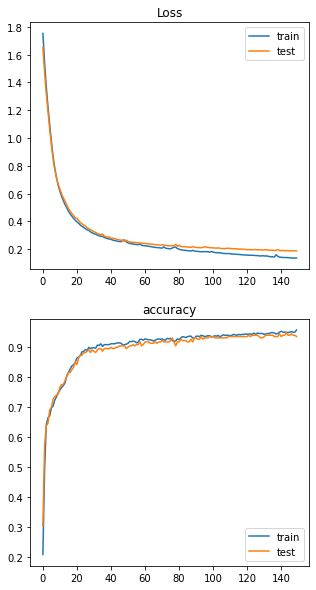

In [ ]:
# See how your model is doing
plot_history(history, 'accuracy')

In [ ]:
# get raw predictions
raw_pred = model.predict(X_test)
 
# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:7])
print('\nbinarized y_test\n', y_test_bin[:7])

Raw Predictions
 [[1.20551670e-06 3.22327338e-04 9.99676466e-01 8.07778368e-19
  6.58983163e-14 4.63092144e-18 5.65648223e-11]
 [6.18740892e-11 6.97366486e-05 9.99930263e-01 1.53718054e-22
  2.18784871e-17 4.91635130e-22 3.36569705e-08]
 [4.08481160e-09 2.14031828e-03 8.03052350e-16 1.30076776e-08
  9.13758695e-01 1.09560166e-10 8.41009393e-02]
 [4.15756984e-10 3.67189415e-07 9.99999523e-01 1.83641044e-18
  3.62879714e-16 3.07466963e-18 9.25443331e-08]
 [1.80715286e-11 6.08266681e-04 9.99389410e-01 3.34164488e-21
  2.13913423e-17 2.07767155e-20 2.20739548e-06]
 [3.17310824e-15 8.67930794e-06 3.94506025e-11 6.94319207e-16
  2.06394242e-11 2.89733888e-14 9.99991298e-01]
 [2.71882482e-11 6.79320514e-01 1.64508211e-08 2.43569072e-17
  8.82008067e-09 9.65977019e-16 3.20679426e-01]]

binarized y_test
 [[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [ ]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)
 
print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [2 2 4 2 2 6 1 4 5 4 6 2 2 3 5 5 3 2 5 6 5 2 3 1 0 4 2 4 0 2 5 1 4 5 1 5 5
 6 1 5 0 5 2 5 4 2 6 2 2 0 4 3 2 5 0 4 3 6 2 5 2 1 4 1 3 5 2 2 4 5 2 2 2 2
 4 5 4 2 5 6 5 2 1 6 2 0 3 6 2 5 1 5 3 2 2 5 4 6 1 4 3 4 2 2 4 4 1 3 5 2 2
 4 6 1 3 5 3 2 4 3 5 5 4 6 2 5 0 5 2 5 4 2 0 5 5 1 5 2 4 4 4 5 6 5 4 5 5 0
 2 3 6 2 2 5 5 1 6 5 1 2 5 4 5 0 4 4 0 5 3 2 1 2 4 2 1 6 2 6 6 1 4 2 5 5 4
 0 1 4 3 0 5 5 1 2 5 5 2 4 4 4 4 6 0 4 4 5 5 6 1 5 6 0 2 6 4 1 5 4 4 4 4 0
 1 5 6]
integer true labels [2 2 4 2 2 6 1 4 5 4 6 1 2 3 5 5 3 2 5 6 5 2 3 1 0 4 2 4 0 2 5 1 4 5 2 5 5
 1 1 5 0 5 1 5 4 2 6 2 2 0 4 3 2 5 0 4 3 6 2 5 2 1 4 2 3 5 2 2 4 5 2 2 2 2
 4 3 4 2 5 6 5 2 1 6 2 0 3 1 2 3 1 5 3 2 2 5 4 6 2 4 3 4 2 2 4 4 1 3 5 2 2
 4 6 1 3 5 3 2 4 3 5 5 4 6 2 5 0 5 2 5 4 2 0 5 5 6 5 2 4 4 4 5 6 5 6 5 5 0
 2 3 6 2 2 5 5 1 6 1 1 2 5 4 5 0 4 4 0 5 3 2 1 2 4 2 1 6 2 6 4 1 4 2 5 5 4
 0 1 4 3 0 5 5 1 2 5 5 2 4 4 1 4 6 0 6 4 5 5 6 1 5 6 0 2 6 4 1 5 4 4 4 4 0
 1 5 6]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      0.76      0.79        25
           2       0.96      0.94      0.95        51
           3       1.00      0.89      0.94        18
           4       0.93      0.98      0.95        42
           5       0.94      1.00      0.97        50
           6       0.87      0.87      0.87        23

    accuracy                           0.93       225
   macro avg       0.93      0.92      0.93       225
weighted avg       0.93      0.93      0.93       225



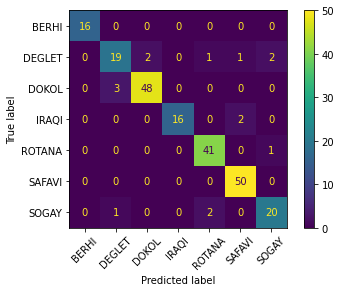

In [ ]:
# print classification report and confusion matrix
 
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        xticks_rotation=45);